In [1]:
import torch
from torch import nn

torch.__version__

'2.5.1+cu121'

In [2]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

GET THE DATA

In [3]:
from math import e
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path/"pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists....skipping download")

else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True,exist_ok=True)


with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak, sushi data...


In [7]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi' 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test' 
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza' 
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak' 
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi' 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train' 
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza' 
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak' 
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi' 


In [8]:
train_dir=image_path/"train"
test_dir=image_path/"test"

In [9]:
import random
from PIL import Image
image_path_list=list(image_path.glob("*/*/*.jpg"))
random.seed(77)

data/pizza_steak_sushi/train/pizza/3505182.jpg
pizza
shape: (512, 512, 3)


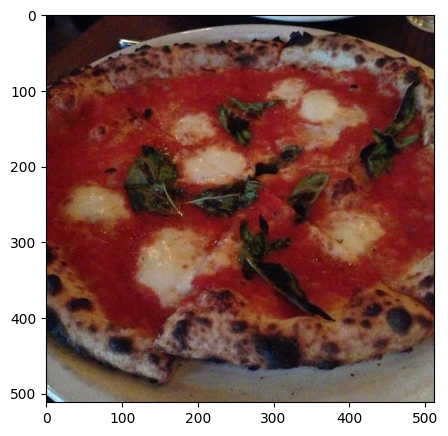

In [10]:
random_image=random.choice(image_path_list)
print(random_image)
image_class=random_image.parent.stem
print(image_class)
img=Image.open(random_image)
import numpy as np
import matplotlib.pyplot as plt
img_as_array=np.array(img)
plt.figure(figsize=(5,7))
plt.imshow(img_as_array)
print(f"shape: {img_as_array.shape}")

In [11]:
#transforming data into tensors
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [15]:
data_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

In [16]:
data_transform(img)

tensor([[[0.5020, 0.5020, 0.4941,  ..., 0.0745, 0.0902, 0.0941],
         [0.5176, 0.5098, 0.4941,  ..., 0.0471, 0.0667, 0.0824],
         [0.4627, 0.4353, 0.4118,  ..., 0.0353, 0.0431, 0.0510],
         ...,
         [0.5843, 0.6000, 0.6039,  ..., 0.4196, 0.1294, 0.0824],
         [0.5843, 0.5882, 0.5882,  ..., 0.0902, 0.0784, 0.1098],
         [0.5804, 0.5804, 0.5765,  ..., 0.0667, 0.0902, 0.1098]],

        [[0.4667, 0.4510, 0.4392,  ..., 0.0588, 0.0627, 0.0627],
         [0.4431, 0.4353, 0.4275,  ..., 0.0314, 0.0431, 0.0549],
         [0.3882, 0.3647, 0.3490,  ..., 0.0235, 0.0196, 0.0235],
         ...,
         [0.5961, 0.6078, 0.6118,  ..., 0.5020, 0.1569, 0.0784],
         [0.5961, 0.5961, 0.5882,  ..., 0.1098, 0.0667, 0.0745],
         [0.5961, 0.5882, 0.5725,  ..., 0.0549, 0.0706, 0.0902]],

        [[0.3373, 0.3412, 0.3451,  ..., 0.0863, 0.1020, 0.1059],
         [0.3176, 0.3216, 0.3333,  ..., 0.0627, 0.0824, 0.0980],
         [0.2941, 0.2824, 0.2824,  ..., 0.0588, 0.0588, 0.

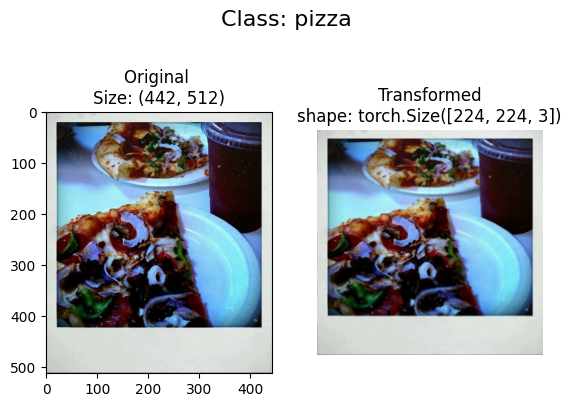

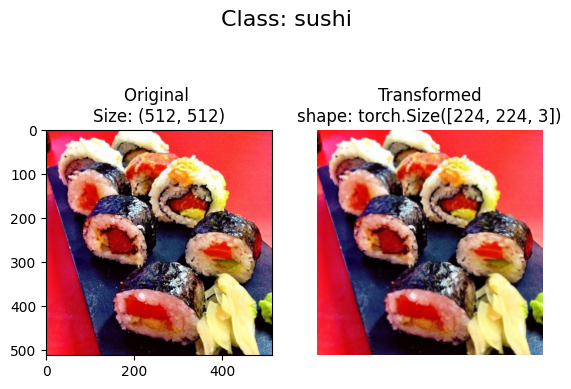

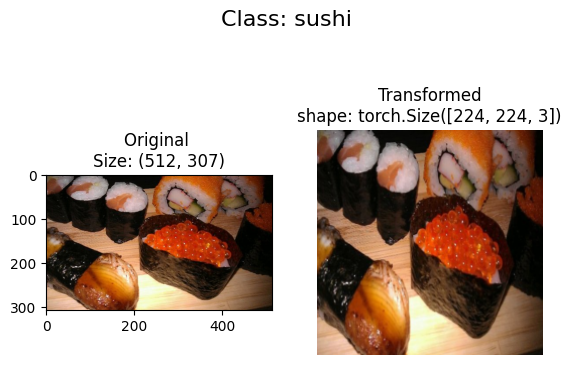

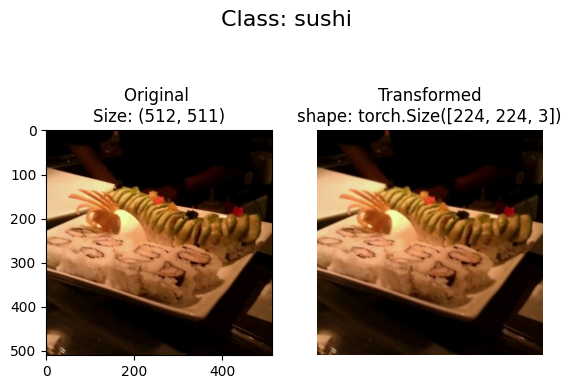

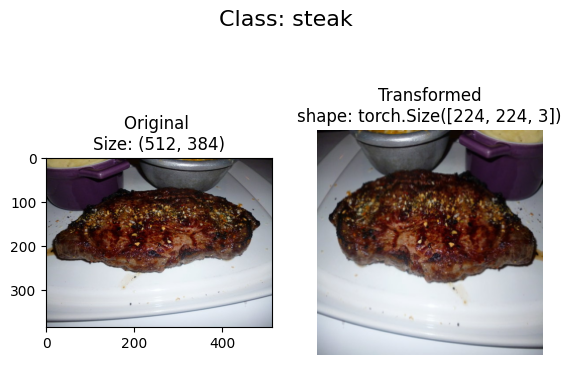

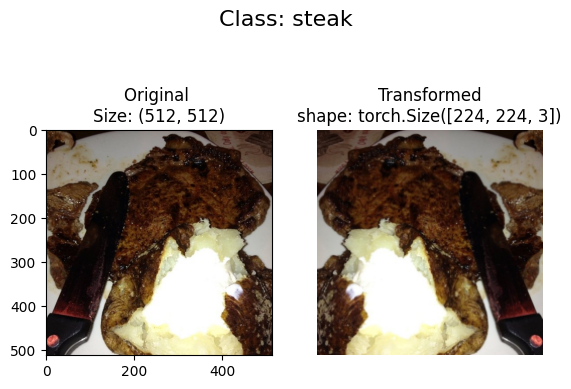

In [21]:
def plot_transformed_img(image_paths:list,transform,n=2,seed=76):
  if seed:
    random.seed(seed)
  random_image_path=random.sample(image_paths,k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig,ax =plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")

      transformed_image=transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nshape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)

plot_transformed_img(image_paths=image_path_list,transform=data_transform,n=6,seed=90)

In [23]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,transform=data_transform,
                                target_transform=None)


test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [26]:
class_names=train_data.class_to_idx
class_names

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [32]:
img,label=train_data[0][0],train_data[0][1]
label,img

(0,
 tensor([[[0.1098, 0.1098, 0.1098,  ..., 0.1255, 0.1176, 0.1137],
          [0.1137, 0.1176, 0.1176,  ..., 0.1137, 0.1137, 0.1176],
          [0.1216, 0.1255, 0.1216,  ..., 0.1098, 0.1176, 0.1137],
          ...,
          [0.1804, 0.1725, 0.1725,  ..., 0.0863, 0.0902, 0.0941],
          [0.1686, 0.1686, 0.1647,  ..., 0.0902, 0.0902, 0.0902],
          [0.1529, 0.1529, 0.1490,  ..., 0.0824, 0.0863, 0.0863]],
 
         [[0.0549, 0.0549, 0.0549,  ..., 0.0824, 0.0745, 0.0706],
          [0.0588, 0.0627, 0.0627,  ..., 0.0706, 0.0706, 0.0745],
          [0.0627, 0.0667, 0.0627,  ..., 0.0667, 0.0784, 0.0706],
          ...,
          [0.2314, 0.2314, 0.2353,  ..., 0.1020, 0.1059, 0.1098],
          [0.2314, 0.2314, 0.2275,  ..., 0.1059, 0.1059, 0.1059],
          [0.2235, 0.2235, 0.2196,  ..., 0.0980, 0.1020, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.1059, 0.0980, 0.0941],
          [0.0196, 0.0235, 0.0235,  ..., 0.0941, 0.0941, 0.0980],
          [0.0196, 0.0235, 0.0235,  

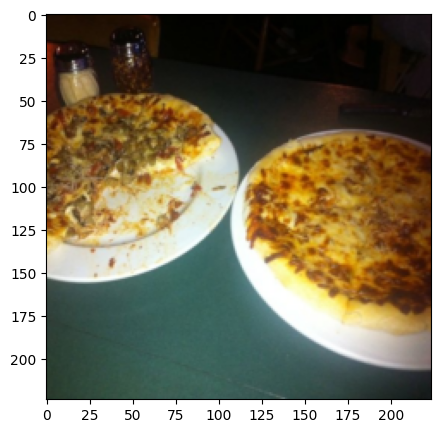

In [34]:
img_permute=img.permute(1,2,0)
plt.figure(figsize=(5,5))
plt.imshow(img_permute)

In [35]:
# batchifying our datasets

In [41]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=1,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a882af19b10>,
 <torch.utils.data.dataloader.DataLoader at 0x7a882af1a9d0>)

In [42]:
len(train_dataloader),len(test_dataloader)

(8, 3)

In [43]:
len(train_data)

225

In [44]:
img,label=next(iter(train_dataloader))
print(f"shape of data: {img.shape}")
print(f"shape of label: {label.shape}")

shape of data: torch.Size([32, 3, 224, 224])
shape of label: torch.Size([32])


DATA AUGMENTATION

In [45]:
train_transform=transforms.Compose([transforms.Resize(size=(224,224)),
                                    transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                    transforms.ToTensor()])


test_transform=transforms.Compose([transforms.Resize(size=(224,224)),
                                    transforms.ToTensor()])

In [47]:
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg')]

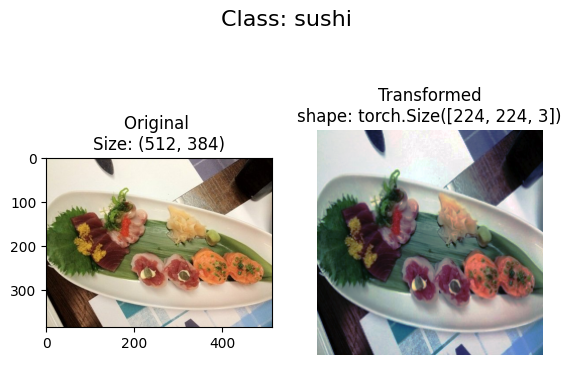

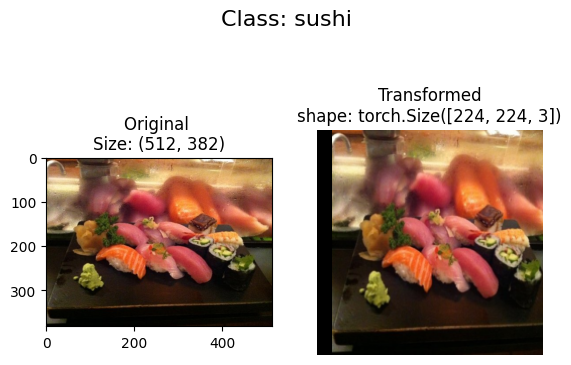

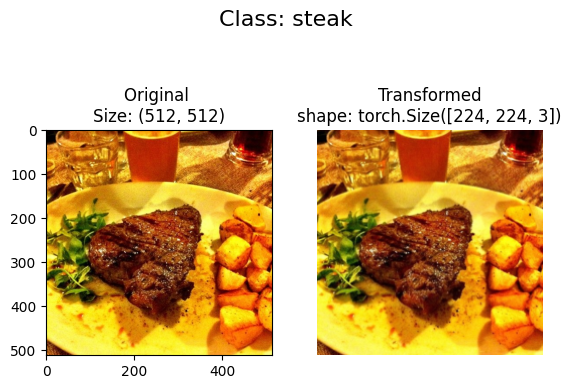

In [49]:
plot_transformed_img(image_paths=image_path_list,
                     transform=train_transform,
                     n=3,
                     seed=None
                     )

MODEL_0 TINY VGG

In [50]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [51]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7a882af4af90>,
 <torch.utils.data.dataloader.DataLoader at 0x7a882ae703d0>)

In [72]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [73]:
model=TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data.classes))
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [74]:
image_batch,label_batch=next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [76]:
model(image_batch.to(device))

tensor([[-0.0113, -0.0095, -0.0130],
        [-0.0079, -0.0073, -0.0115],
        [-0.0083, -0.0104, -0.0131],
        [-0.0100, -0.0095, -0.0115],
        [-0.0088, -0.0102, -0.0083],
        [-0.0101, -0.0078, -0.0109],
        [-0.0082, -0.0090, -0.0132],
        [-0.0102, -0.0127, -0.0089],
        [-0.0094, -0.0104, -0.0127],
        [-0.0104, -0.0101, -0.0104],
        [-0.0099, -0.0123, -0.0111],
        [-0.0084, -0.0130, -0.0128],
        [-0.0100, -0.0101, -0.0113],
        [-0.0111, -0.0116, -0.0089],
        [-0.0110, -0.0081, -0.0081],
        [-0.0103, -0.0108, -0.0120],
        [-0.0085, -0.0075, -0.0130],
        [-0.0120, -0.0113, -0.0093],
        [-0.0100, -0.0099, -0.0100],
        [-0.0112, -0.0077, -0.0119],
        [-0.0087, -0.0106, -0.0114],
        [-0.0105, -0.0103, -0.0111],
        [-0.0087, -0.0091, -0.0139],
        [-0.0117, -0.0148, -0.0092],
        [-0.0104, -0.0104, -0.0118],
        [-0.0091, -0.0122, -0.0094],
        [-0.0098, -0.0077, -0.0141],
 

In [77]:
!pip install torchinfo

In [81]:
import torchinfo
from torchinfo import summary
summary(model,input_shape=[1,3,64,64])

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      7,683
Total params: 10,693
Trainable params: 10,693
Non-trainable params: 0